# 1. CTR Prediction with DL
## 1.1 개요
**CTR 예측(Click-Through Rate Prediction)**

CTR 예측 : 유저가 주어진 아이템을 클릭할 확률(Probability)을 예측하는 문제
- CTR 예측은 주로 광고에 사용되며 광고주 및 서비스 제공자들의 이익 창출에 사용된다.
- CTR 예측이 정확해지는 것은 곧바로 매출 향상에 직결된다.
<br></br>

CTR 예측에 딥러닝이 필요한 이유
- 현실의 CTR 데이터(ex.광고 데이터)를 기존의 선형 모델로 예측하는 데에는 한계가 있다.
- 1. Highly sparse & super high-dimensional features
- 2. highly non-linear association between the features
- => 이러한 데이터에 효과적인 딥러닝 기법들이 cTR 예측 문제에 적용되기 시작했다.

# 2. Wide & Deep
## 2.1 개요
**Wide & Deep Learning for Recommender Systems**

선형적인 모델(Wide)과 비선형적인 모델(Deep)을 결합하여 기존 모델들의 장점을 모두 취하고자 한 논문이다.
- 구글에서 발표한 논문
- Play Store에서 사용자가 검색한 쿼리에서 앱을 추천해주는 task에 적용 중이다.

**Wide & Deep의 등장 배경**

추천시스템에서 해결해야 할 두 가지 과제 : Memorization & Generalization
- Memorization : 함께 빈번히 등장하는 아이템 혹은 특성(feature) 관계를 과거 데이터로부터 학습한다(=암기).
- Generalization : 드물게 발생하거나 전혀 발생한 적 없는 아이템/특성 조합을 기존 관계로부터 발견한다(=일반화).
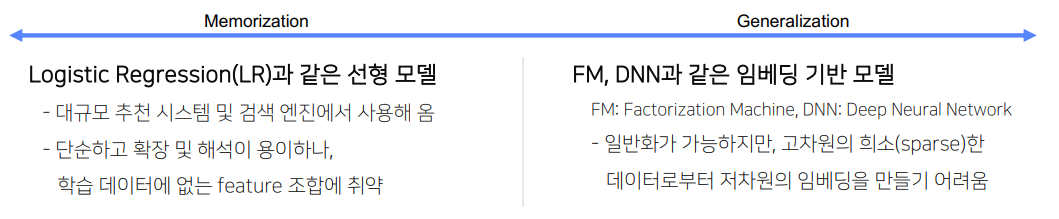
- **=> 이 둘을 결합하여 사용자의 검색 쿼리에 맞는 앱을 추천하는 모델을 제안했다.**

## 2.2 Wide & Deep의 구조
### 1. The Wide Component
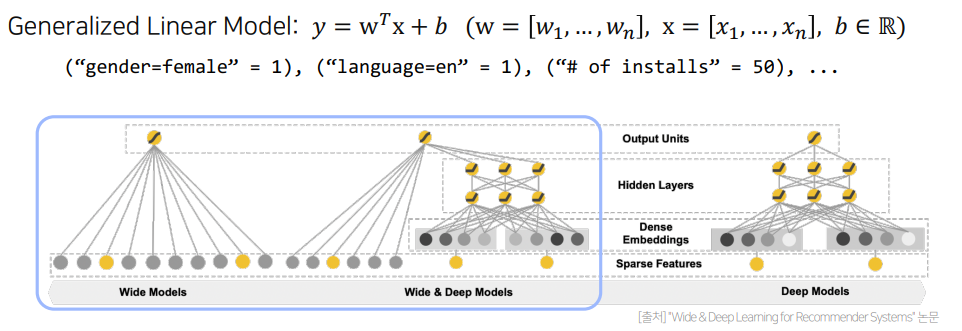
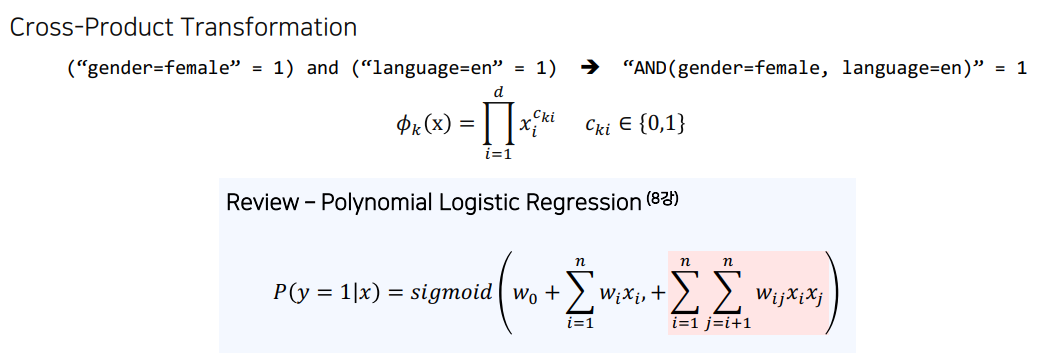

### 2. The Deep Component

**Feed-Forward neural Network**
- 3 layer로 구성되었으며, ReLU 함수를 사용한다.
- 연속형 변수는 그대로 사용하고, 카테고리형 변수는 피쳐 임베딩 후 사용한다.
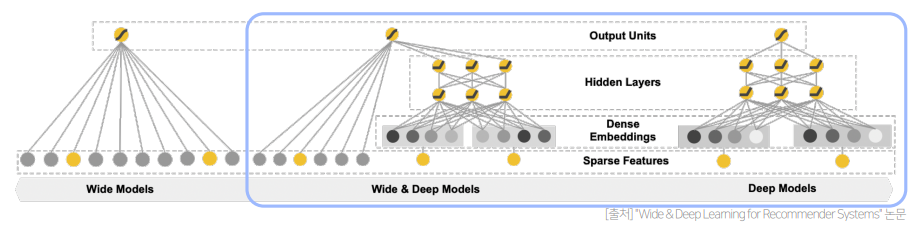

### 3. 전체 구조 및 손실 함수
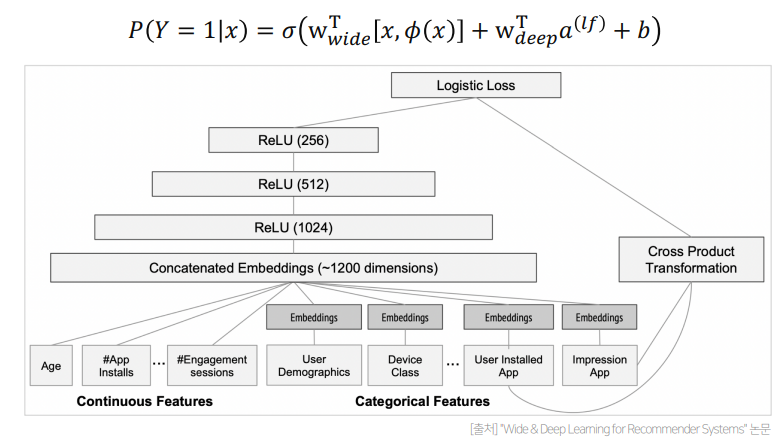

**모델 성능**

Baseline인 Wide 모델과 Deep 모델은 각각 Offline, Online에서 서로 다른 양상을 보이지만, 두 개 모델을 결합하여 만든 Wide & Deep 모델은 모두 좋은 성능을 보였다.
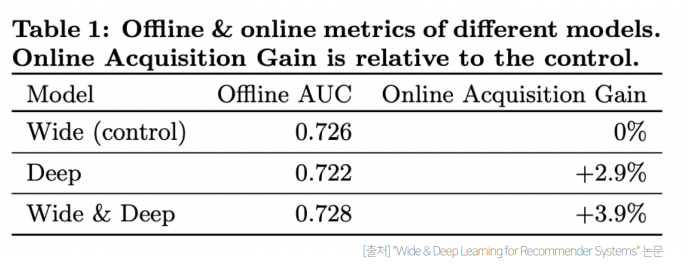

# 3. DeepFM
## 3.1 개요
**DeepFM : A Factorization-Machine based Neural Network for CTR Prediction**

Wide & Deep 모델과 달리 두 요소(wide, deep)가 입력값을 공유하도록 한 end-to-end 방식의 모델이다.

**DeepFM의 등장 배경**

추천 시스템에서는 Implicit Feature Interaction을 학습하는 것이 중요하다.
- ex 1) 식사 시간에 배달앱 다운로드 수가 증가한다(order-2 interaction)
- ex 2) 10대 남성은 슈팅/RPG 게임을 선호한다(order-3 interaction)
<br></br>

기존 모델들은 low-나 high-order interaction 중 어느 한 쪽에만 강햇다.
- Wide & Deep 모델은 이 둘을 통합하여 문제를 해결했으나, wide component에 feature engineering(=Cross-Product Transformation)이 필요하다는 단점이 있다.
- => FM을 wide component로 사용하여 입력값을 공유하도록 했다.
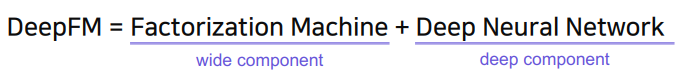

## 3.2 DeepFM의 구조
### 1. FM Component

FM for low-order feature interaction
- 기존의 FM 모델과 완전히 동일한 구조이다.
- order-2 feature interaction을 효과적으로 잡았다.
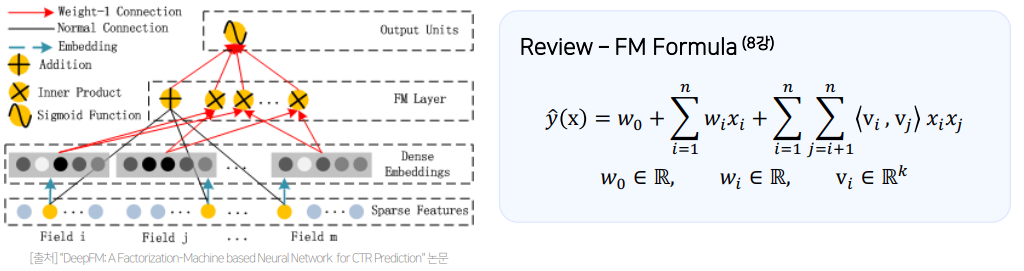

### 2. Deep Component
DNN for high-order feature interaction
- 모든 feature들은 동일한 차원($k$)의 임베딩으로 치환된다.
- 이 때, 임베딩에 사용되는 가중치는 FM Component의 가중지($V_{ij}$)와 동일하다.
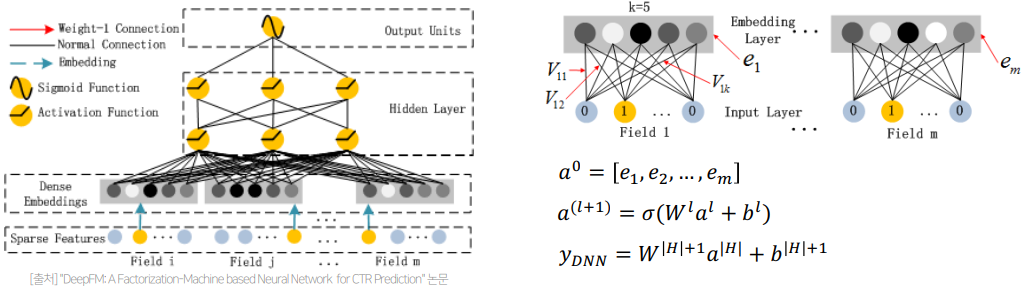

### 3. 전체 구조
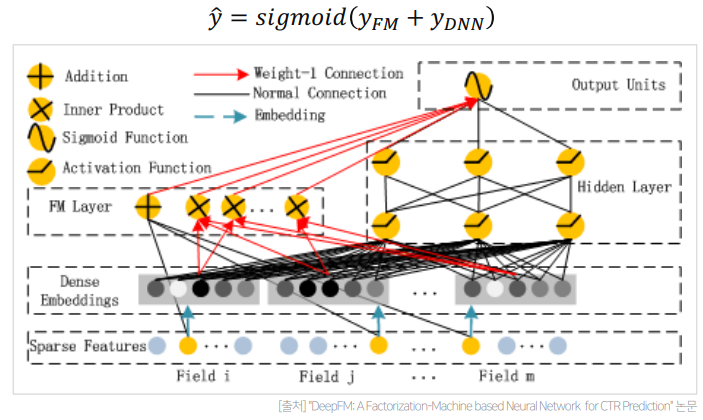

**타 모델과의 비교**
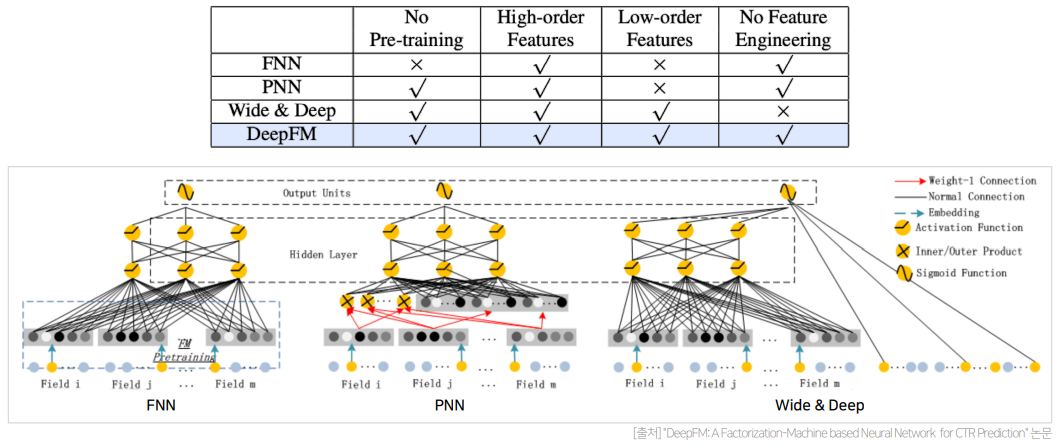

**모델 성능**
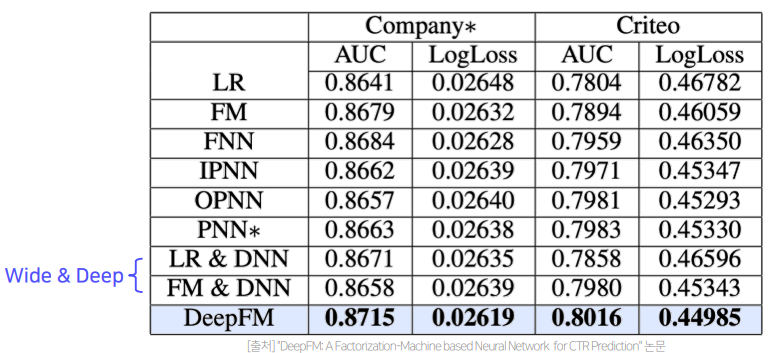

# 4. Deep Interest Network(DIN)
## 4.1 개요
**Deep Interest Network for Click-Through Rate Prediction**
- User behavior feature를 처음 사용한 논문이다.

**Deep interest Network(DIN)의 등장 배경**

기존의 딥러닝 기반 모델들은 모두 유사한 Embedding & MLP 패러다임을 따랐다.
- sparse feature들을 저차원 임베딩으로 변환 후 fully connected layer(=MLP)의 입력으로 사용했다.
<br></br>

이러한 기존의 방식은 사용자의 다양한(diverse) 관심사를 반영할 수 없다.
- ex) 여러 종류의 식재료와 생필품을 동시에 찾아볼 때
- ex) 특정 카테고리의 상품을 검색하여 보던 도중에 추천 목록에 있는 상품을 클릭할 때
- **=> 사용자가 기존에 소비한 아이템의 리스트를 User Behavior Feature로 만들어, 예측 대상 아이템과 이미 소비한 아이템 사이의 관련성을 학습한다.**

## 4.2 User Behavior Feature
**사용된 피쳐 목록**
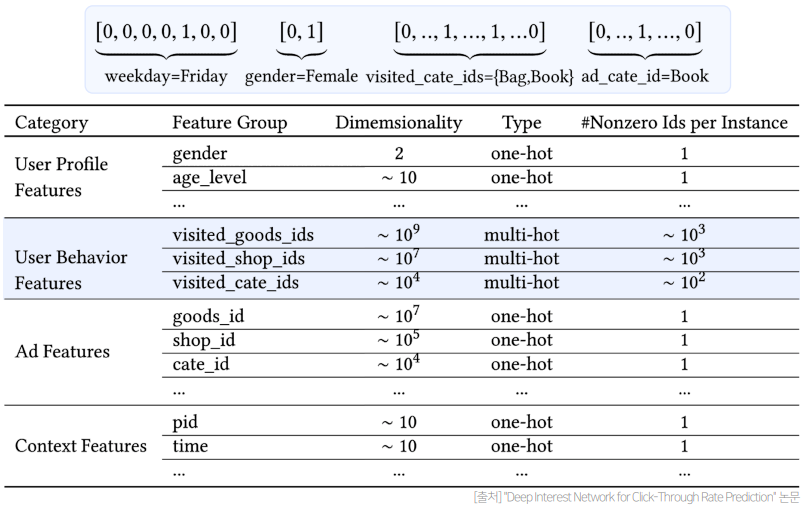

**모델 구성**
1. Embedding Layer
2. **Local Activation Layer**
3. Fully-connected Layer
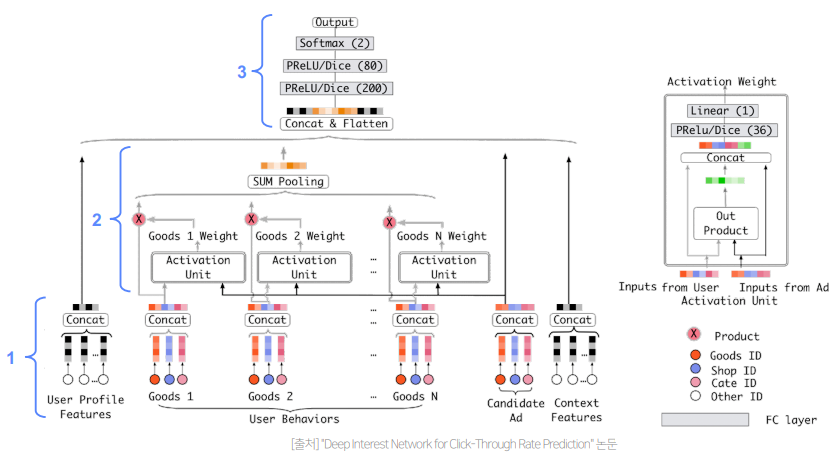

**Local Activation Layer**(transformer의 attention 메커니즘과 유사하다)

**Local Activation Unit**
- 후보군이 되는 광고를 기존에 본 광고들의 연광성을 계산하여 가중치로 표현한다.
<br></br>

**Weighted Sum Pooling**
- 여러 개의 표현 벡터를 가중 합한 값을 출력으로 사용한다.

후보 광고에 따라 과거 User Behavior에서 소비했던 광고들의 weight크기가 달라진다.
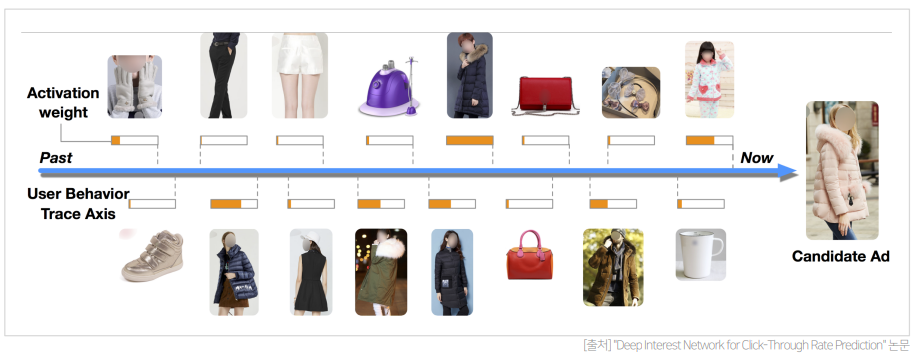

**모델 성능** 
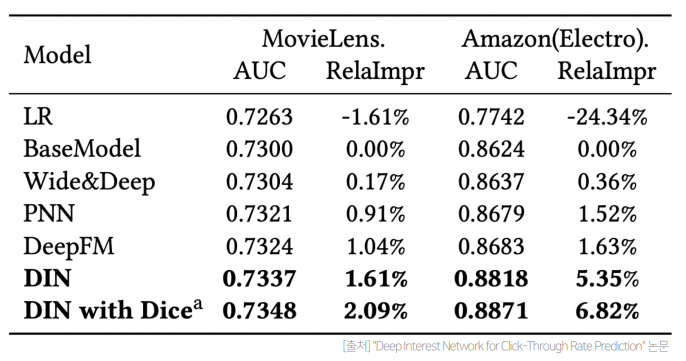

# 5. Behavior Sequence Transformer(BST)
## 5.1 개요
**Behavior Sequence Transformer for E-commerce Recommendation in Alibaba**
- Transformer를 사용한 CTR 예측 논문이다.

**CTR Prediction with Transformer**

CTR 예측 데이터와 NLP 번역 데이터 간 공통점
- 대부분 sparse feature로 구성되어 있다.
- low-와 high-order feature interaction이 모두 존재하여 비선형적 관계를 이룬다.
- 문장의 순서가 중요하듯, 사용자의 행동 순서(user behavior sequence) 또한 중요하다.
- ex 1) 핸드폰을 구매한 뒤 핸드폰 케이스 상품들을 찾아보는 경향이 있다.
- ex 2) 바지를 구매한 뒤 그에 맞는 신발을 찾아보려 한다.
<br></br>

NLP 분야 전반에서 강력한 성능을 보이는 Transforemr 구조를 CTR 예측에도 적용해 볼 수 있다.
- 앞서, DIN에서도 Transformer의 attention 역할을 하는 local activation unit을 사용한다.

## 5.2 Transformer
**Attention is All You Need**
- Transformer를 처음 제안한 논문이다.

**Attention Mechanism**

입력 값의 어떤 부분에 주의(attention)를 기울일 것인지를 찾는 원리이다.
- key($K$)-value($V$) 쌍들이 주어질 때, 알고자 하는 query($Q$)에 대응하는 value를 
- query와 key들의 연관성을 가중치로 하여 value들의 가중합으로 계산한다.
<br></br>

$$Attention(Q, K, V) = Value\ of\ Q = similarity\ (Q, k)\ \times \ V$$
<br></br>

입력$\cdot$출력의 길이를 고려하지 않아도 단어 간 의존성(dependency) 파악이 가능하다.
- ex) 번역 문제 : 번역할 문장의 길이를 고정하지 않아도 사용 가능하다.

**Attention Mechanism in NLP**

- 주어진 단어(=query)가 전체 단어(=keys)와 각각 얼마나 관계가 있는지를 가중치로 사용하여,
- 전체 단어에 대응되는 값들(=values)의 가중 합으로 주어진 단어에 대응되는 결과를 도출한다.
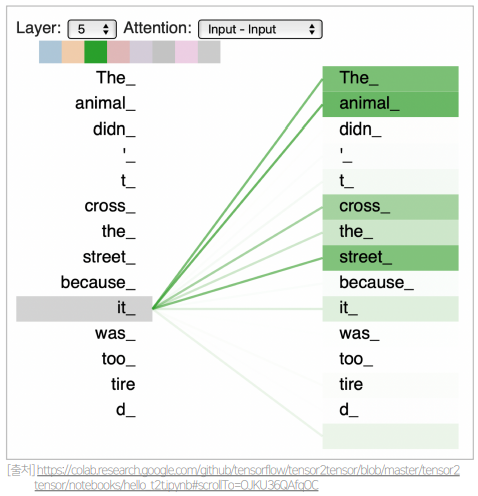

**Scale Dot-product Attention**

query와 key 벡터를 내적한 값을 key의 차원 크기($d_k$)에 비례하여 스케일링하고, 이를 softmax 함수에 넣어 0~1 사이의 값으로 변환한 것을 query와 key 사이의 유사도로 취급한다.
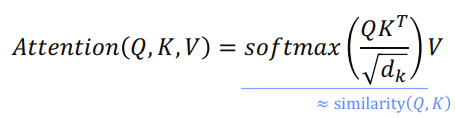

scale dot-product attention은 self-attention에 해당한다.
- self-attention : query($Q$), key($K$), value($V$)가 모두 같은 도메인에 속하는 attention

**Mulit-head Attention**

차원이 큰 attention을 한 번 수행하는 것보다 여러 개의 작은 attention을 병렬로 처리하는 것이 효과적이다.
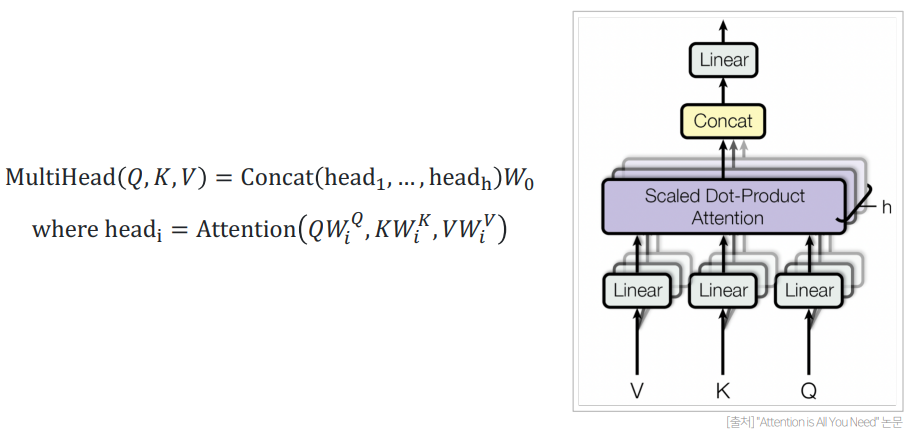

**Transformer의 전체 구조**

Encoder-Decoder 구조
- 각각 6개의 동일한 레이어를 쌓아 구성된다.
<br></br>

Attention외 사용 기법들
1. Positional Encoding
- RNN과 달리 attentino만으로는 단어의 순서를 표현할 수 없다.
- 따라서 단어가 등장하는 위치 정보를 피쳐 임베딩에 더해준다.

2. Add & Norm
- Add : Residual Connection
- Norm : Layer Normalization
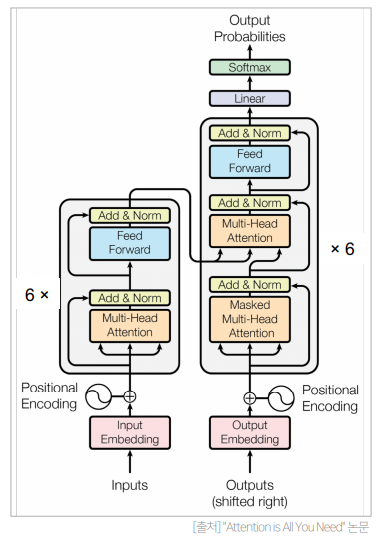

## 5.3 BST 구조
**BST의 전체 구조**
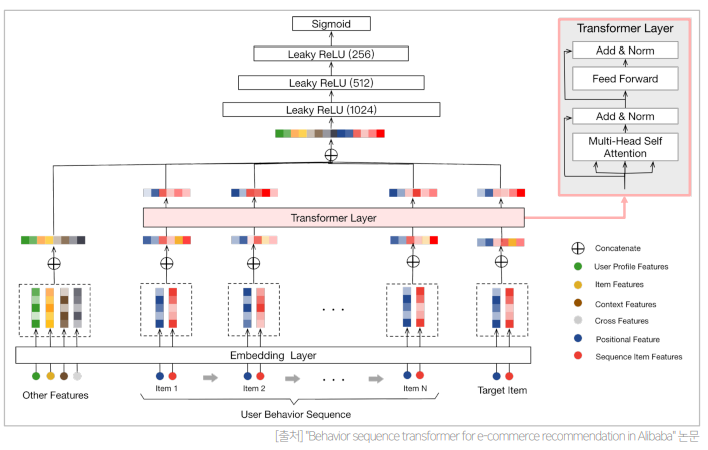

**Transformer Encoder Layer**
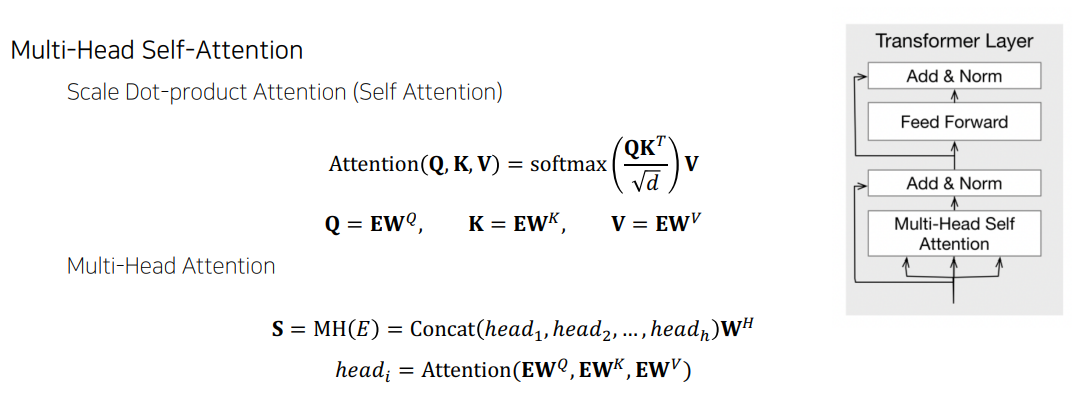
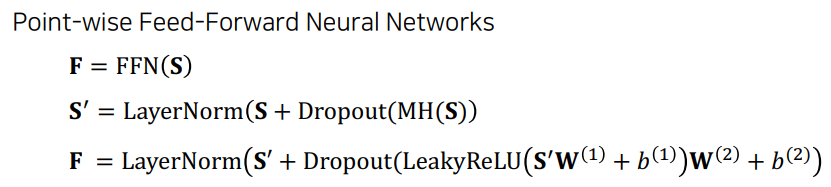
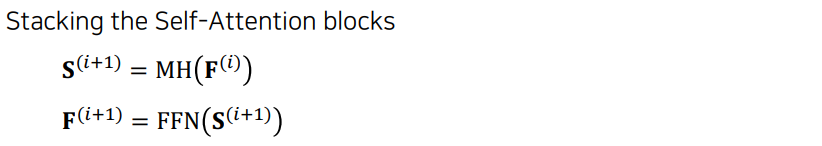

**BST 비교**

vs. DIN

- local activation layer -> *transforemr layer*
- user behavior feature -> *user behavior sequence*
<br></br>

vs. Transformer
- dropout과 leakyReLU 추가
- 레이어 1~4개 사용(best:1개)
- Custom Positional Encoding : $pos(v_i) = t(v_t)-t(v_i)$
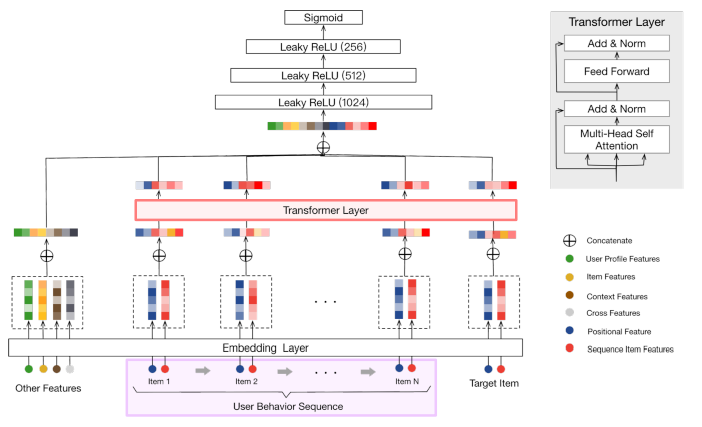

**모델 성능**

Transformer는 CTR Prediction Task에서도 SOTA의 성능을 보였다.
단, Transformer 블록을 2개 이상 쌓을 때 오히려 성능이 감소했다.
- CTR예측 Task의 sequence는 machine translation과 같은 NLP Sequence보다는 덜 복잡한 것으로 보인다.
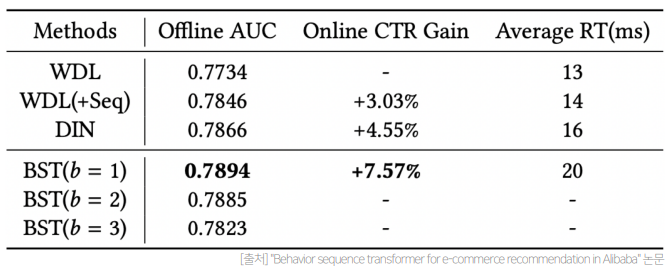